<a href="https://colab.research.google.com/github/Jarin160/Genre_Based_Recommendation_System/blob/main/python_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re
import os
import nltk
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [115]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

# Feature Description:

1. title
2. rating
3. name
4. num_ratings
5. num_reviews
6. um_followers
7. synopsis
8. genre

In [6]:
data = pd.read_csv("data.csv")
data.head()

,Unnamed: 0,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history
1,1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history
2,2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history
3,3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history
4,4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history


In [9]:
data.drop(data.columns[0],inplace = True,axis = 1)
data.head()

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history
2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history
4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history


The genres that are currently present in the dataset are

1. thriller
2. fantasy
3. romance
4. horror
5. history
6. psychology
7. travel
8. science
9. sports
10. science_fiction

In [13]:
data.shape

(1539, 8)

In [12]:
data.nunique()

,0
title,1539
rating,130
name,842
num_ratings,1535
num_reviews,1469
num_followers,1016
synopsis,1539
genre,10


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1539 non-null   int64  
 1   title          1539 non-null   object 
 2   rating         1539 non-null   float64
 3   name           1539 non-null   object 
 4   num_ratings    1539 non-null   object 
 5   num_reviews    1539 non-null   object 
 6   num_followers  1539 non-null   object 
 7   synopsis       1539 non-null   object 
 8   genre          1539 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 108.3+ KB


In [15]:
data['genre'].value_counts()

,count
genre,
thriller,481
fantasy,348
romance,111
horror,100
history,99
psychology,99
travel,98
science,79
sports,79


In [36]:
genre_df = pd.DataFrame({'genre':['thriller','fantasy','romance','horror','history','psychology','travel','science','sports','science_fiction'],'count':[481,348,111,100,99,99,98,79,79,45]})
fig = px.histogram(genre_df,x = 'genre',y = 'count',color = 'genre')
fig.show()

In [35]:
#text processing
stopword = set(stopwords.words('english'))

def clean(text):
  text = text.lower() #Converting to lowerCase
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ',text) #removing punctuation

  text_tokens = word_tokenize(text) #removing stopwords
  tw = [word for word in text_tokens if not word in stopword]
  text = (" ").join(tw)

  splt = text.split(' ')
  output = [x for x in splt if len(x) > 3] #removing words with length<=3
  text = (" ").join(output)

  text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) #removing single character
  text = re.sub('<.*?>+',' ',text) #removing HTML Tags
  text = re.sub('\n', ' ',text) #removal of new line characters
  text = re.sub(r'\s+', ' ',text) #removal of multiple spaces
  return text


data['title'] = data['title'].apply(clean)
data['synopsis'] = data['synopsis'].apply(clean)

In [45]:
def print_wordCloud(genre, synopsis):
    print(genre)
    wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                min_font_size = 10, colormap='viridis').generate(synopsis) # Changed colormap
    plt.figure(figsize = (6, 6), facecolor = 'white', edgecolor='blue')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

def make_string(genre):
    s = ""
    for row_index,row in data.iterrows():
        if(row['genre'] == genre):
            s+=(row['synopsis']+' ')
    return s

thriller


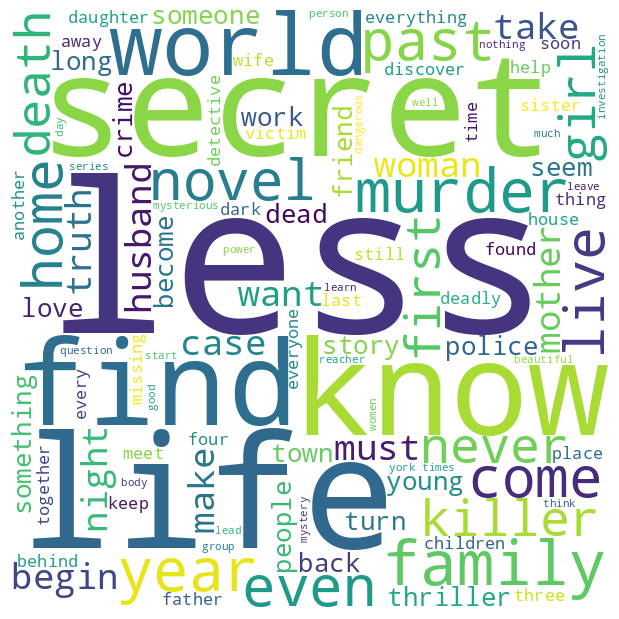

fantasy


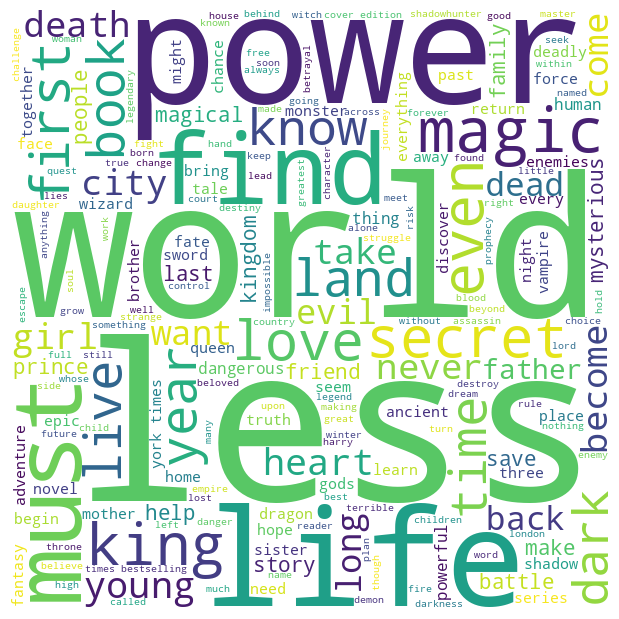

romance


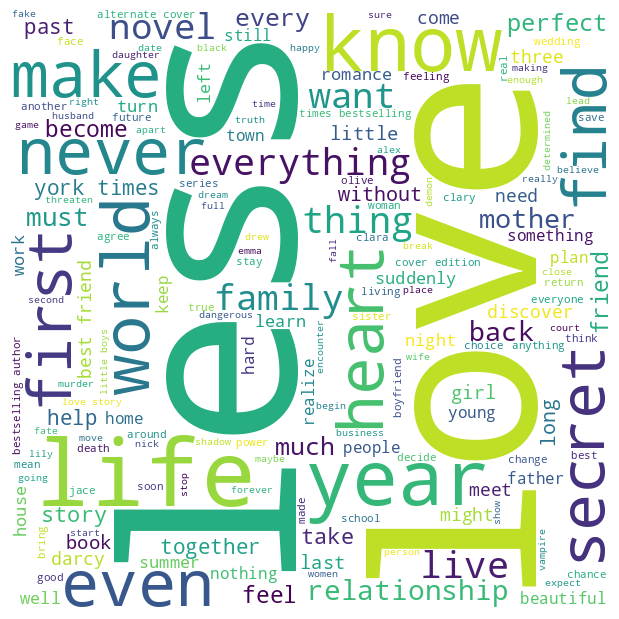

horror


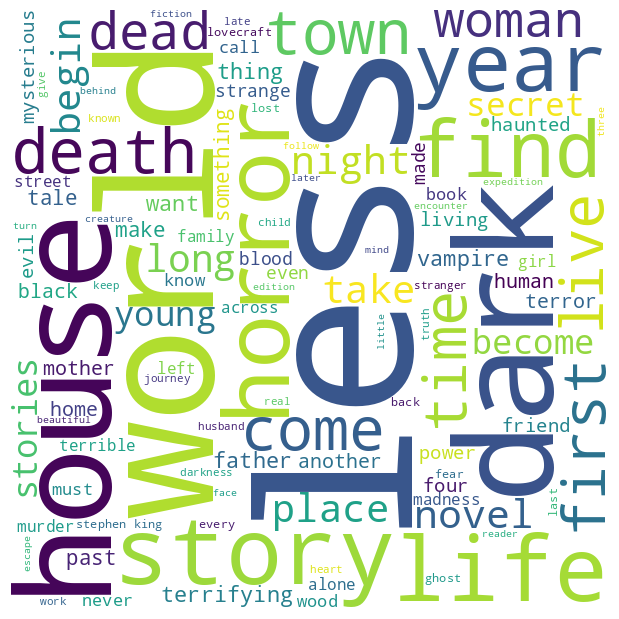

history


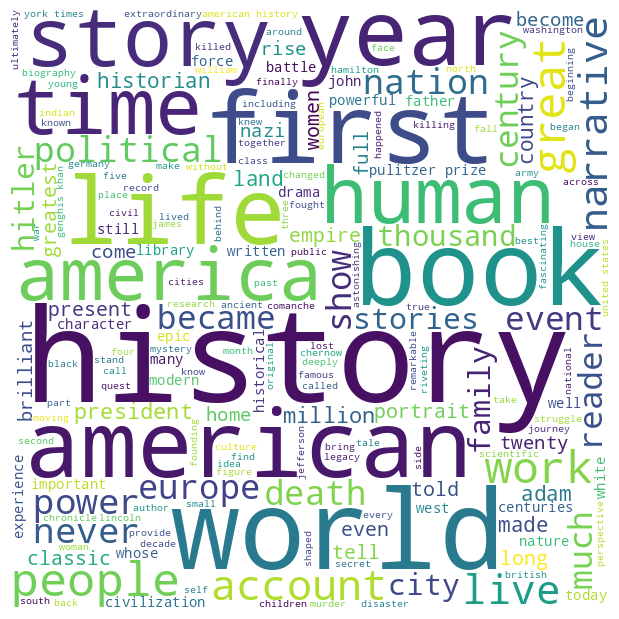

psychology


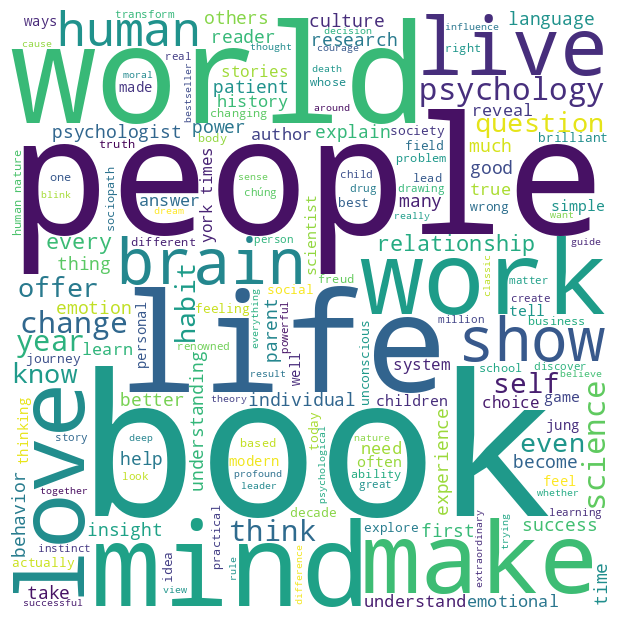

travel


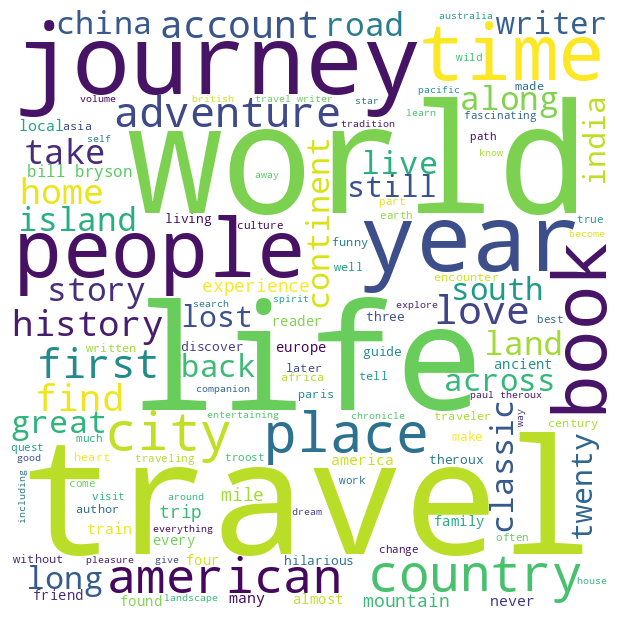

science


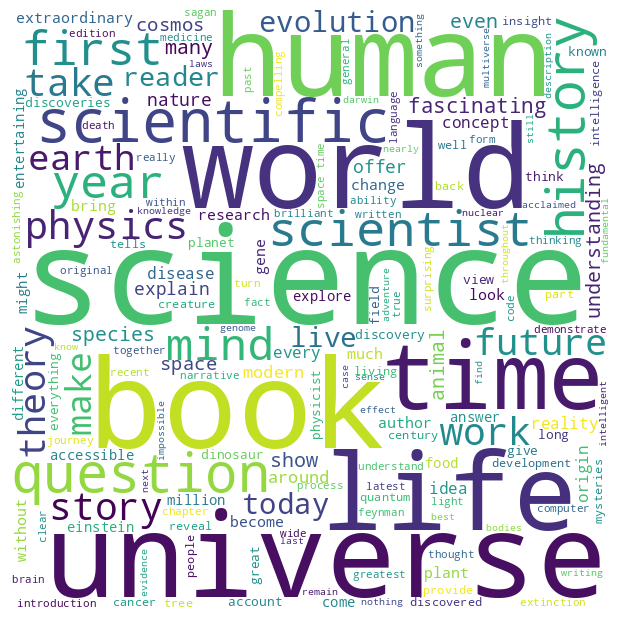

sports


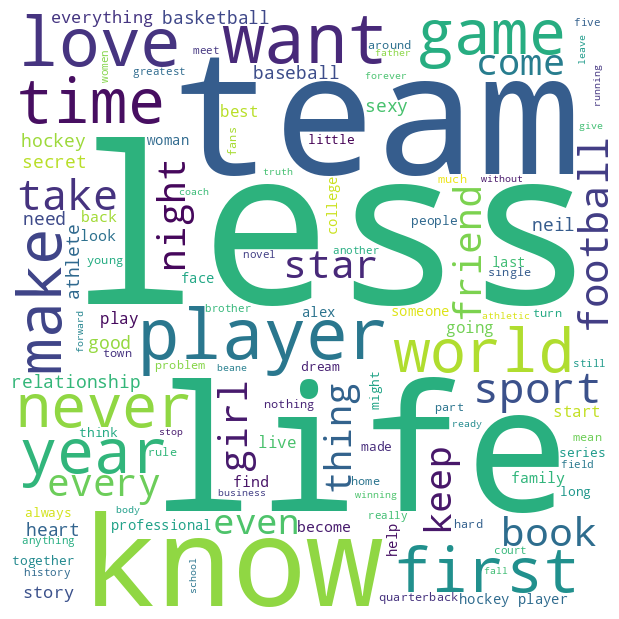

science_fiction


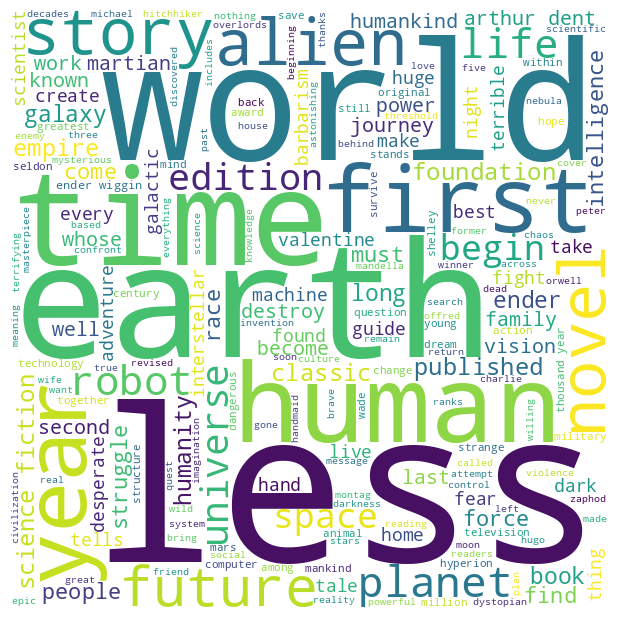

In [46]:
genre = ['thriller','fantasy','romance','horror','history','psychology','travel','science','sports','science_fiction']
for Genre in genre:
    synopsis = make_string(Genre)
    print_wordCloud(Genre,synopsis)

In [51]:
def data_preprocessing(text):
    tokens = word_tokenize(text) #Tokenization
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens] #Lemmetization
    tokens = [SnowballStemmer(language = 'english').stem(word) for word in tokens] #Stemming
    return " ".join(tokens)

data['title'] = data['title'].apply(data_preprocessing)
data['synopsis'] = data['synopsis'].apply(data_preprocessing)

Bag of Words

In [106]:
X = CountVectorizer().fit_transform(data['synopsis'])
data['genre'] = LabelEncoder().fit_transform(data['genre'])
y = data['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [107]:
model = LogisticRegression()

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

name = type(model).__name__
grid_lr = GridSearchCV(model, param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)
best_model = grid_lr.best_estimator_
print(f"Best parameters for {name}: {grid_lr.best_params_}")

best_model.fit(X_train, y_train)

Test_prediction = best_model.predict(X_test)
Test_Accuracy = accuracy_score(Test_prediction,y_test)
Precision = precision_score(Test_prediction,y_test,average = 'macro')
Recall = recall_score(Test_prediction,y_test,average = 'macro')
F1_Score = f1_score(Test_prediction,y_test,average = 'macro')
print(name + ' Successfully Trained')

Dict = {'Name':[name],'Test_Accuracy':[Test_Accuracy],'Precision_score':[Precision],'Recall_score':[Recall],
        'F1_score':[F1_Score]}
new_row_lr = pd.DataFrame(Dict)


model_df = pd.DataFrame()

model_df = pd.concat([model_df, new_row_lr], ignore_index=True)
display(model_df)

Best parameters for LogisticRegression: {'C': 100}
LogisticRegression Successfully Trained


,Name,Test_Accuracy,Precision_score,Recall_score,F1_score
0,LogisticRegression,0.796537,0.723781,0.772052,0.738317


In [111]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf_model = grid_rf.best_estimator_

print(f"Best parameters for Random Forest: {grid_rf.best_params_}")

y_train_pred_rf = best_rf_model.predict(X_train)
y_test_pred_rf = best_rf_model.predict(X_test)

test_accuracy_rf = accuracy_score(y_test_pred_rf, y_test)
precision_rf = precision_score(y_test_pred_rf, y_test, average='macro')
recall_rf = recall_score(y_test_pred_rf, y_test, average='macro')
f1_rf = f1_score(y_test_pred_rf, y_test, average='macro')

print(f"Random Forest - Test Accuracy: {test_accuracy_rf:.4f}")
print(f"Random Forest - Precision (macro): {precision_rf:.4f}")
print(f"Random Forest - Recall (macro): {recall_rf:.4f}")
print(f"Random Forest - F1 Score (macro): {f1_rf:.4f}")

# Add the results to the model_df for comparison
new_row_rf = pd.DataFrame({
    'Name': ['RandomForestClassifier'],
    'Test_Accuracy': [test_accuracy_rf],
    'Precision_score': [precision_rf],
    'Recall_score': [recall_rf],
    'F1_score': [f1_rf]
})

model_df = pd.concat([model_df, new_row_rf], ignore_index=True)

display(model_df)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Test Accuracy: 0.6732
Random Forest - Precision (macro): 0.4760
Random Forest - Recall (macro): 0.5590
Random Forest - F1 Score (macro): 0.4912


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



,Name,Test_Accuracy,Precision_score,Recall_score,F1_score
0,LogisticRegression,0.796537,0.723781,0.772052,0.738317
1,RandomForestClassifier,0.673160,0.476034,0.558968,0.491151


In [120]:
tfidf = TfidfVectorizer(stop_words='english')
X_t= tfidf.fit_transform(data['synopsis'])
x_train, x_test, Y_train, Y_test = train_test_split(X_t, y, test_size = 0.3, random_state = 42)

In [118]:
model = LogisticRegression()

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

name = type(model).__name__
grid_lr = GridSearchCV(model, param_grid_lr, cv=5)
grid_lr.fit(x_train, Y_train)
best_model = grid_lr.best_estimator_
print(f"Best parameters for {name}: {grid_lr.best_params_}")

best_model.fit(x_train, Y_train)

Test_prediction = best_model.predict(x_test)
Test_Accuracy = accuracy_score(Test_prediction,Y_test)
Precision = precision_score(Test_prediction,Y_test,average = 'macro')
Recall = recall_score(Test_prediction,Y_test,average = 'macro')
F1_Score = f1_score(Test_prediction,Y_test,average = 'macro')
print(name + ' Successfully Trained')

Dict = {'Name':[name],'Test_Accuracy':[Test_Accuracy],'Precision_score':[Precision],'Recall_score':[Recall],
        'F1_score':[F1_Score]}
new_row_lr = pd.DataFrame(Dict)


model_df = pd.DataFrame()

model_df = pd.concat([model_df, new_row_lr], ignore_index=True)
display(model_df)

Best parameters for LogisticRegression: {'C': 100}
LogisticRegression Successfully Trained


,Name,Test_Accuracy,Precision_score,Recall_score,F1_score
0,LogisticRegression,0.770563,0.638905,0.80945,0.690172


In [119]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_rf.fit(x_train, Y_train)

best_rf_model = grid_rf.best_estimator_

print(f"Best parameters for Random Forest: {grid_rf.best_params_}")

y_train_pred_rf = best_rf_model.predict(x_train)
y_test_pred_rf = best_rf_model.predict(x_test)

test_accuracy_rf = accuracy_score(y_test_pred_rf, Y_test)
precision_rf = precision_score(y_test_pred_rf, Y_test, average='macro')
recall_rf = recall_score(y_test_pred_rf, Y_test, average='macro')
f1_rf = f1_score(y_test_pred_rf, Y_test, average='macro')

print(f"Random Forest - Test Accuracy: {test_accuracy_rf:.4f}")
print(f"Random Forest - Precision (macro): {precision_rf:.4f}")
print(f"Random Forest - Recall (macro): {recall_rf:.4f}")
print(f"Random Forest - F1 Score (macro): {f1_rf:.4f}")

# Add the results to the model_df for comparison
new_row_rf = pd.DataFrame({
    'Name': ['RandomForestClassifier'],
    'Test_Accuracy': [test_accuracy_rf],
    'Precision_score': [precision_rf],
    'Recall_score': [recall_rf],
    'F1_score': [f1_rf]
})

model_df = pd.concat([model_df, new_row_rf], ignore_index=True)

display(model_df)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest - Test Accuracy: 0.6277
Random Forest - Precision (macro): 0.4177
Random Forest - Recall (macro): 0.6800
Random Forest - F1 Score (macro): 0.4674


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



,Name,Test_Accuracy,Precision_score,Recall_score,F1_score
0,LogisticRegression,0.770563,0.638905,0.809450,0.690172
1,RandomForestClassifier,0.627706,0.417685,0.679978,0.467362


**Using Both Book Title and Synopsis column to train Model**

In [108]:
data['Cleaned_title'] = data['title'].apply(clean)
data['Cleaned_synopsis'] = data['synopsis'].apply(clean)
data['Cleaned_Authors'] = data['name'].apply(clean)

In [110]:
def create_soup(row):
    return ''.join(row['Cleaned_title']) + ' ' + ''.join(row['Cleaned_synopsis']) + ' ' + ''.join(row['Cleaned_synopsis'])


data['corpus'] = data.apply(create_soup, axis=1)
data['Cleaned_corpus'] = data['corpus'].apply(clean)
data.head()

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre,Cleaned_title,Cleaned_synopsis,Cleaned_Authors,corpus,Cleaned_corpus
0,sapien brief histori humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,year least human speci inhabit earth today hom...,1,sapien brief histori humankind,year least human speci inhabit earth today hom...,yuval noah harari,sapien brief histori humankind year least huma...,sapien brief histori humankind year least huma...
1,gun germ steel fate human societi,4.04,Jared Diamond,"3,67,056","12,879","6,538",diamond written book remark scope import reada...,1,germ steel fate human societi,diamond written book remark scope import reada...,jared diamond,germ steel fate human societi diamond written ...,germ steel fate human societi diamond written ...
2,peopl histori unit state,4.07,Howard Zinn,"2,24,620","6,509","2,354",book zinn present differ side histori tradit f...,1,peopl histori unit state,book zinn present differ side histori tradit f...,howard zinn,peopl histori unit state book zinn present dif...,peopl histori unit state book zinn present dif...
3,devil white citi murder magic mad fair chang a...,3.99,Erik Larson,"6,13,157","36,644",64.2k,author erik larson imbu incr event surround 18...,1,devil white citi murder magic fair chang america,author erik larson imbu incr event surround 18...,erik larson,devil white citi murder magic fair chang ameri...,devil white citi murder magic fair chang ameri...
4,diari young girl,4.18,Anne Frank,"33,13,033","35,591","4,621",discov attic spent last year life ann frank re...,1,diari young girl,discov attic spent last year life frank remark...,anne frank,diari young girl discov attic spent last year ...,diari young girl discov attic spent last year ...


In [121]:
X_t2= tfidf.fit_transform(data['Cleaned_corpus'])
x2_train, x2_test, Y2_train, Y2_test = train_test_split(X_t2, y, test_size = 0.3, random_state = 42)

In [124]:
model = LogisticRegression()

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

name = type(model).__name__
grid_lr = GridSearchCV(model, param_grid_lr, cv=5)
grid_lr.fit(x2_train, Y2_train)
best_model = grid_lr.best_estimator_
print(f"Best parameters for {name}: {grid_lr.best_params_}")

best_model.fit(x2_train, Y2_train)

Test_prediction = best_model.predict(x2_test)
Test_Accuracy = accuracy_score(Test_prediction,Y2_test)
Precision = precision_score(Test_prediction,Y2_test,average = 'macro')
Recall = recall_score(Test_prediction,Y2_test,average = 'macro')
F1_Score = f1_score(Test_prediction,Y2_test,average = 'macro')
print(name + ' Successfully Trained')

Dict = {'Name':[name],'Test_Accuracy':[Test_Accuracy],'Precision_score':[Precision],'Recall_score':[Recall],
        'F1_score':[F1_Score]}
print(Dict)

Best parameters for LogisticRegression: {'C': 100}
LogisticRegression Successfully Trained
{'Name': ['LogisticRegression'], 'Test_Accuracy': [0.7705627705627706], 'Precision_score': [0.6389050695486274], 'Recall_score': [0.8094495667216834], 'F1_score': [0.6901717222348553]}


In [126]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_rf.fit(x2_train, Y2_train)

best_rf_model = grid_rf.best_estimator_

print(f"Best parameters for Random Forest: {grid_rf.best_params_}")

y_train_pred_rf = best_rf_model.predict(x2_train)
y_test_pred_rf = best_rf_model.predict(x2_test)

test_accuracy_rf = accuracy_score(y_test_pred_rf, Y2_test)
precision_rf = precision_score(y_test_pred_rf, Y2_test, average='macro')
recall_rf = recall_score(y_test_pred_rf, Y2_test, average='macro')
f1_rf = f1_score(y_test_pred_rf, Y2_test, average='macro')

print(f"Random Forest - Test Accuracy: {test_accuracy_rf:.4f}")
print(f"Random Forest - Precision (macro): {precision_rf:.4f}")
print(f"Random Forest - Recall (macro): {recall_rf:.4f}")
print(f"Random Forest - F1 Score (macro): {f1_rf:.4f}")

# Add the results to the model_df for comparison
new_row_rf = pd.DataFrame({
    'Name': ['RandomForestClassifier'],
    'Test_Accuracy': [test_accuracy_rf],
    'Precision_score': [precision_rf],
    'Recall_score': [recall_rf],
    'F1_score': [f1_rf]
})

model_df = pd.concat([model_df, new_row_rf], ignore_index=True)

display(model_df)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest - Test Accuracy: 0.6277
Random Forest - Precision (macro): 0.4177
Random Forest - Recall (macro): 0.6800
Random Forest - F1 Score (macro): 0.4674


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



,Name,Test_Accuracy,Precision_score,Recall_score,F1_score
0,LogisticRegression,0.770563,0.638905,0.809450,0.690172
1,RandomForestClassifier,0.627706,0.417685,0.679978,0.467362


Recom

In [127]:
df.head(5)

,Unnamed: 0,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history
1,1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history
2,2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history
3,3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history
4,4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history


In [132]:
# Create folder to store genre CSVs
output_folder = "genres"
os.makedirs(output_folder, exist_ok=True)

# Loop through each unique genre and save as separate CSV
# Use the original 'genre' column before label encoding for filenames
original_genre_data = pd.read_csv("data.csv") # Load the original data again to access original genre names

for genre in original_genre_data['genre'].unique():
    genre_df = original_genre_data[original_genre_data['genre'] == genre]

    # Replace spaces in genre name with underscores for file naming
    genre_filename = f"{genre.replace(' ', '_')}.csv"
    genre_df.to_csv(os.path.join(output_folder, genre_filename), index=False)

print("Genre CSV files created successfully!")

Genre CSV files created successfully!
